<a href="https://colab.research.google.com/github/TejaswaniVelugoti/Classification_and_Detection_of_ROI_in_Arachis_hypogaea_Diseases/blob/main/Classification_and_Detection_of_ROI_in_Arachis_hypogaea_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install rembg
!pip install pillow

Import necessary libraries

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, regularizers
from PIL import Image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from rembg import remove

from google.colab.patches import cv2_imshow

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Classes in Dataset

In [ ]:
"""import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
image_paths = [
    '/content/166_1.jpg',
    '/content/dr_23_9909.jpg',
    '/content/dr_2_1576.jpg',
    '/content/dr_2_2500.jpg',
    '/content/dr_9_9907.jpg'
]

num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images, figsize=(20, 4))

for i, path in enumerate(image_paths):
    img = mpimg.imread(path)
    axes[i].imshow(img)
    filename = os.path.basename(path)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
"""


Preprocessing Image Data with ImageDataGenerator in Keras

In [ ]:

train_data_dir = '/content/drive/MyDrive/processed_train'
test_data_dir = '/content/drive/MyDrive/processed_test'

train_datagen = ImageDataGenerator(
    validation_split=0.1,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)


batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,

    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



Found 4937 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


Creating a Transfer Learning Model with NASNetMobile in Keras

In [ ]:

base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential()

model.add(base_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001)))

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_1  (None, 1056)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 512)               541184    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 1285      
                                                      

In [ ]:
base_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['stem_bn1[0][0]']       

Visualization of the Transfer Learning Model Architecture with NASNetMobile

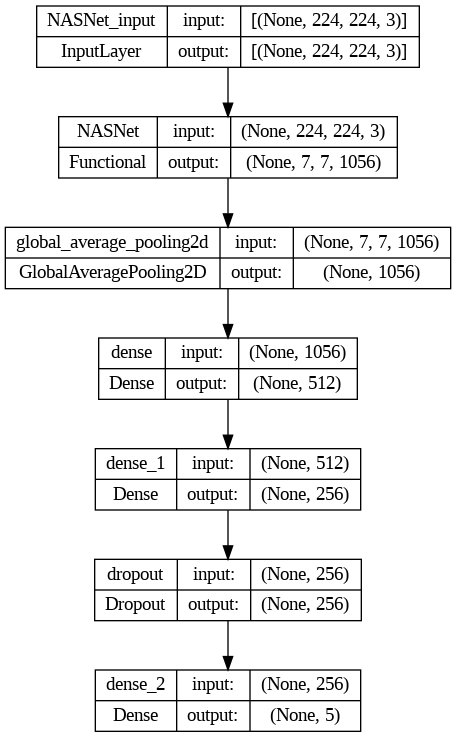

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Training History of Transfer Learning Model with NASNetMobile

In [ ]:
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]

history = model.fit(train_generator, epochs=10,
                         validation_data=test_generator,
                              callbacks=callbacks_list)

Epoch 1/10
155/155 [==============================] - ETA: 0s - loss: 0.8591 - accuracy: 0.7628
Epoch 1: val_accuracy improved from -inf to 0.95000, saving model to ./model_01-0.95.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


155/155 [==============================] - 1397s 9s/step - loss: 0.8591 - accuracy: 0.7628 - val_loss: 0.3596 - val_accuracy: 0.9500
Epoch 2/10
155/155 [==============================] - ETA: 0s - loss: 0.4861 - accuracy: 0.8748
Epoch 2: val_accuracy did not improve from 0.95000
155/155 [==============================] - 81s 526ms/step - loss: 0.4861 - accuracy: 0.8748 - val_loss: 0.3319 - val_accuracy: 0.9420
Epoch 3/10
155/155 [==============================] - ETA: 0s - loss: 0.3785 - accuracy: 0.9093
Epoch 3: val_accuracy did not improve from 0.95000
155/155 [==============================] - 82s 529ms/step - loss: 0.3785 - accuracy: 0.9093 - val_loss: 0.3151 - val_accuracy: 0.9320
Epoch 4/10
155/155 [==============================] - ETA: 0s - loss: 0.3135 - accuracy: 0.9198
Epoch 4: val_accuracy improved from 0.95000 to 0.97200, saving model to ./model_04-0.97.h5
155/155 [==============================] - 83s 533ms/step - loss: 0.3135 - accuracy: 0.9198 - val_loss: 0.1955 - val_a

Training and Validation Accuracy

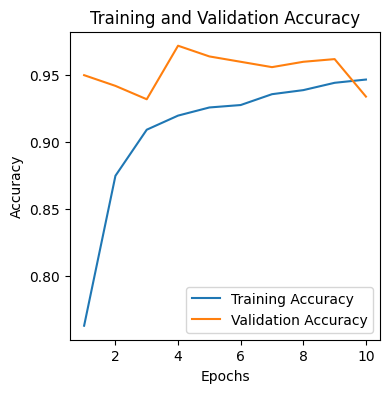

In [ ]:
import matplotlib.pyplot as plt


training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(4,4))
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Training and Validation Loss

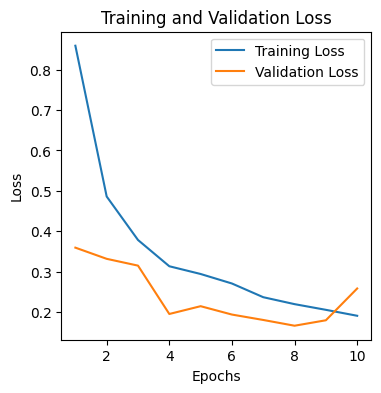

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(4,4))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
from tensorflow.keras.models import load_model

loaded_best_model = load_model("/content/drive/MyDrive/model_04-0.97.h5")


Evaluation Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,classification_report


evaluation = loaded_best_model.evaluate(test_generator)

predictions = loaded_best_model.predict_generator(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)


accuracy=accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:",accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


16/16 [==============================] - 2s 139ms/step - loss: 0.1955 - accuracy: 0.9720


<ipython-input-13-b3ef857c20c7>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = loaded_best_model.predict_generator(test_generator)


Accuracy: 0.972
Precision: 0.9729611674746363
Recall: 0.972
F1 Score: 0.97169729746223


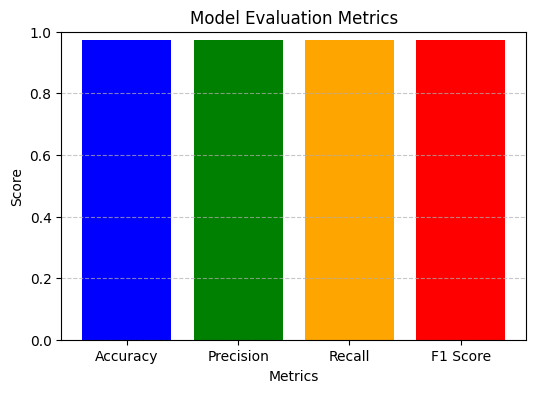

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

accuracy = evaluation[1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#print(classification_report(y_true, y_pred))

Prediction

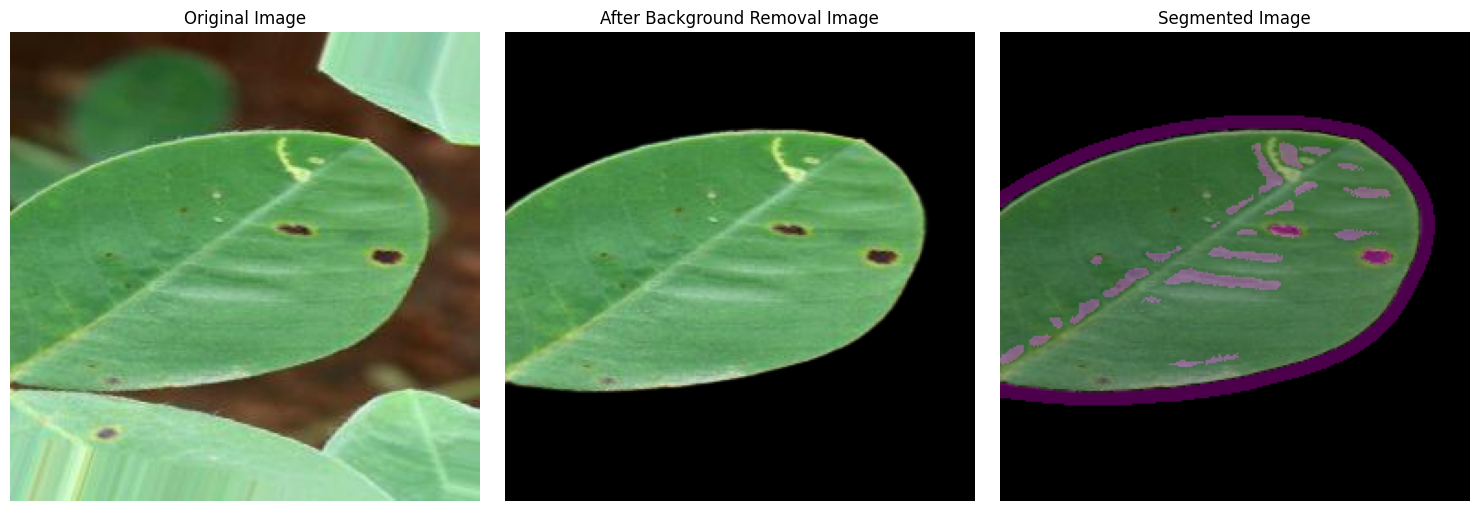

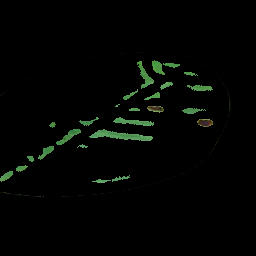

1/1 [==============================] - 0s 78ms/step
Predicted class: 0
Predicted label: early_leaf_spot_1


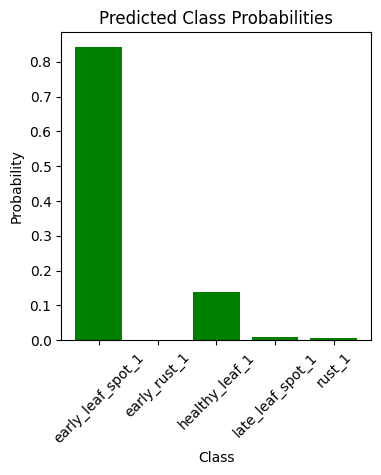

In [ ]:
import matplotlib.pyplot as plt


def plot_predicted_class_probabilities(probabilities, class_labels):

    plt.figure(figsize=(4, 4))
    plt.bar(class_labels.values(), probabilities, color='green')


    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Predicted Class Probabilities')

    plt.xticks(rotation=45)
    plt.show()

def predict_class_with_bg_removal(image_path, class_labels, model):

    oimg = cv2.imread(image_path)

    img = Image.open(image_path)

    R = remove(img)
    processed_array = np.array(R)
    img_opencv = cv2.cvtColor(processed_array, cv2.COLOR_RGB2BGR)

    gray = cv2.cvtColor(img_opencv, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (15, 15), 0)

    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(gray)
    min_contour_area = 1
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:
            cv2.drawContours(mask, [contour], -1, 255, -1)
    white_areas_only = cv2.bitwise_and(img_opencv, img_opencv, mask=mask)

    segmented_image = cv2.bitwise_and(thresh, mask)

    segmented_image_colored = cv2.cvtColor(segmented_image, cv2.COLOR_GRAY2BGR)
    segmented_image_colored[np.where((segmented_image_colored == [255, 255, 255]).all(axis=2))] = [255, 0, 255]

    result = cv2.addWeighted(img_opencv, 0.7, segmented_image_colored, 0.3, 0)

    oimg= cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB)
    img_opencv_rgb = cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB)
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 5))


    plt.subplot(1, 3, 1)
    plt.imshow(oimg)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_opencv_rgb)
    plt.title('After Background Removal Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result_rgb)
    plt.title('Segmented Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    cv2_imshow(white_areas_only)

    img_resized = cv2.resize(img_opencv, (224,224))

    img_array = np.array(img_resized)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)

    predicted_class_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_class_index]

    print("Predicted class:", predicted_class_index)
    print("Predicted label:", predicted_label)
    plot_predicted_class_probabilities(predictions[0], class_labels)


class_labels = {
    0: 'early_leaf_spot_1',
    1: 'early_rust_1',
    2: 'healthy_leaf_1',
    3: 'late_leaf_spot_1',
    4: 'rust_1'
}

img_path = '/content/dr_0_9934.jpg'
predict_class_with_bg_removal(img_path, class_labels, loaded_best_model)


Processing image: /content/drive/MyDrive/DemoTesting/dr_23_7407.jpg


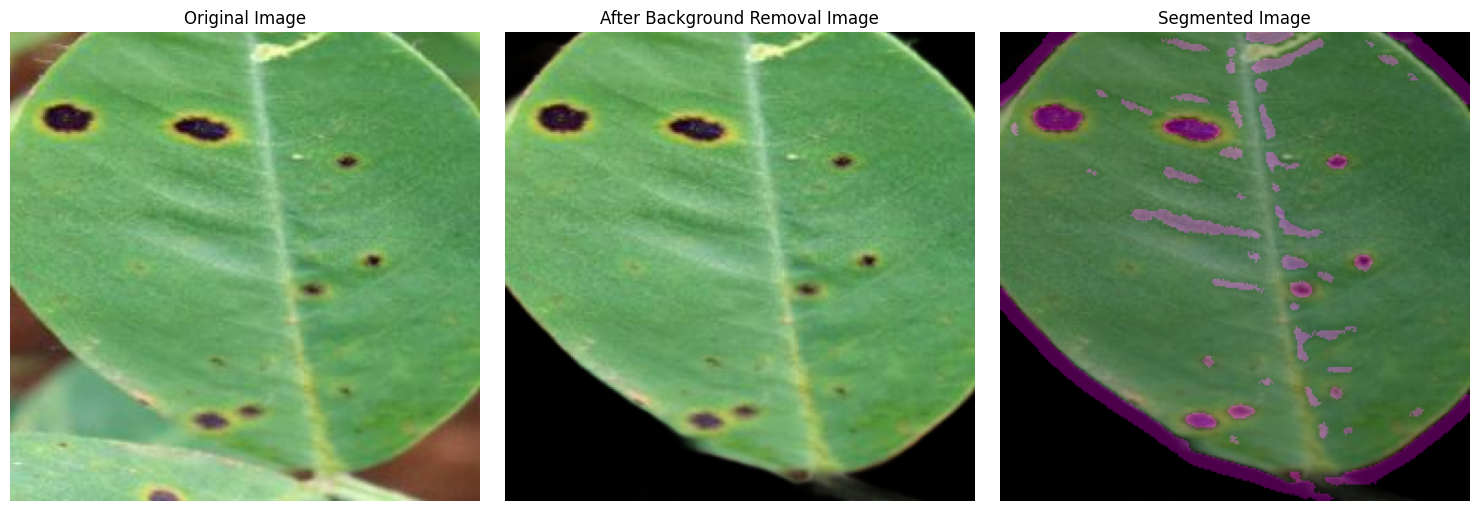

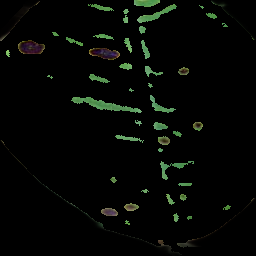

1/1 [==============================] - 0s 193ms/step
Predicted class: 4
Predicted label: rust_1


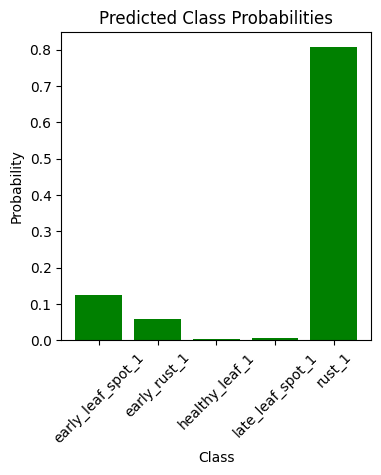

Processing image: /content/drive/MyDrive/DemoTesting/dr_34_8893.jpg


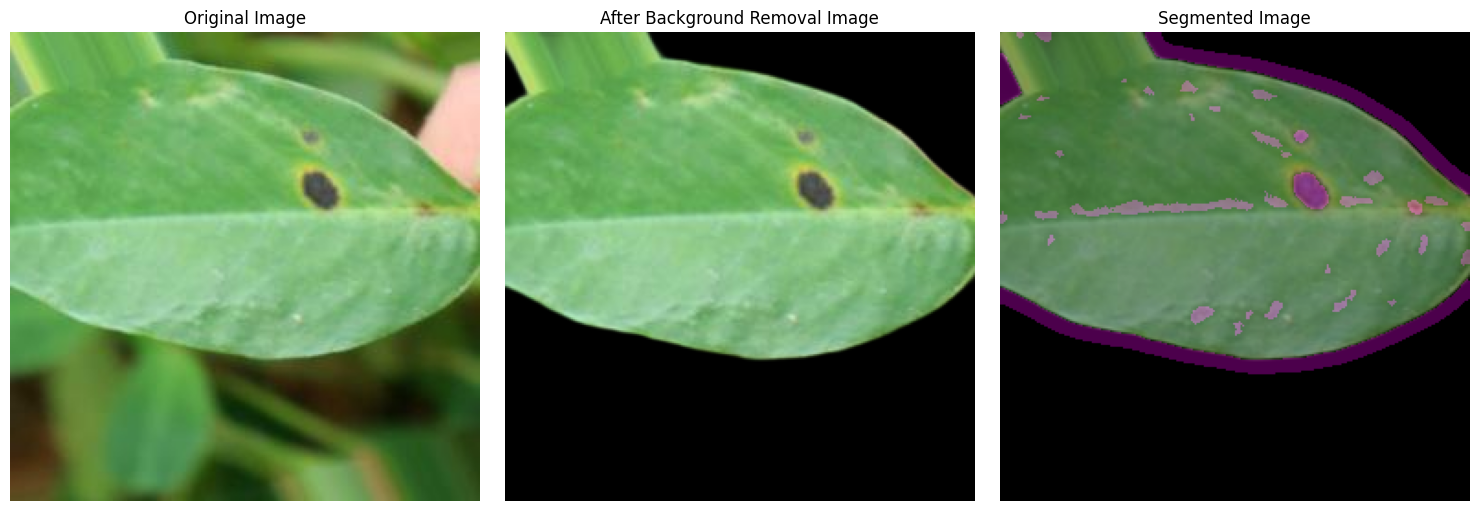

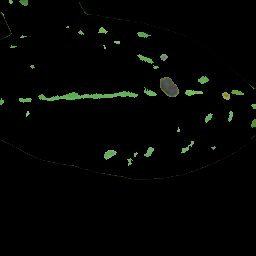

1/1 [==============================] - 0s 66ms/step
Predicted class: 0
Predicted label: early_leaf_spot_1


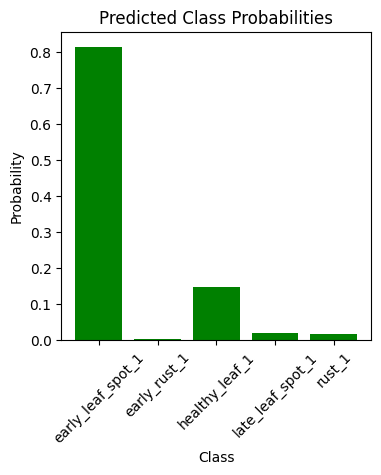

Processing image: /content/drive/MyDrive/DemoTesting/dr_2_3416.jpg


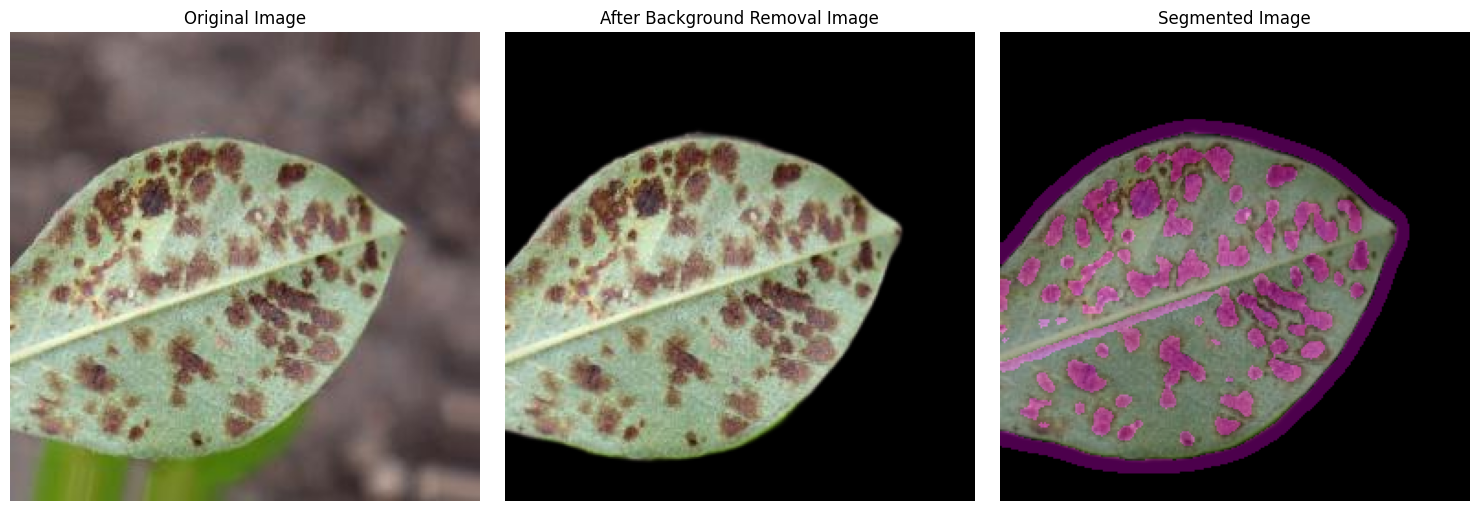

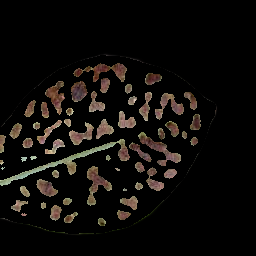

1/1 [==============================] - 0s 67ms/step
Predicted class: 1
Predicted label: early_rust_1


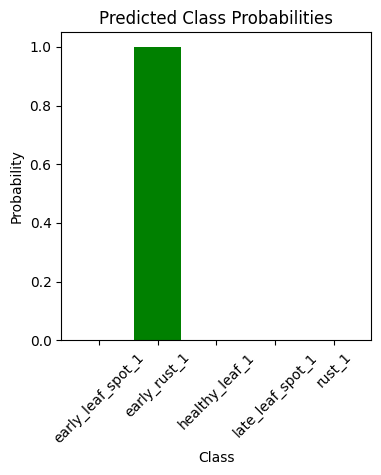

Processing image: /content/drive/MyDrive/DemoTesting/dr_7_7610.jpg


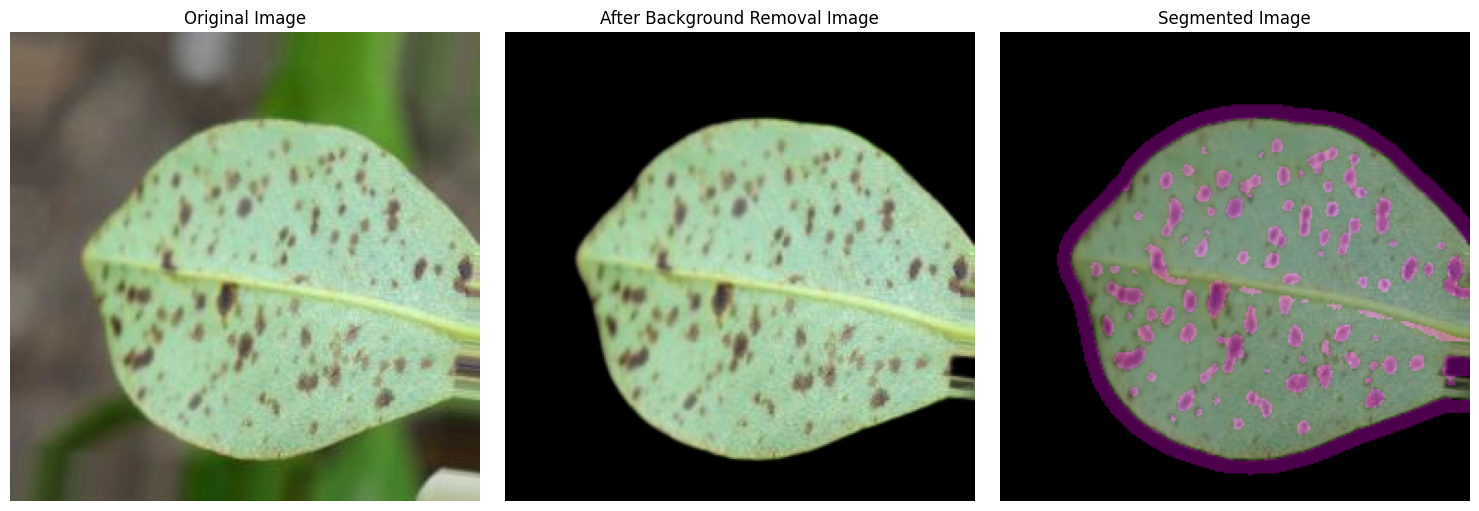

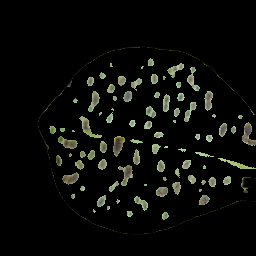

1/1 [==============================] - 0s 115ms/step
Predicted class: 4
Predicted label: rust_1


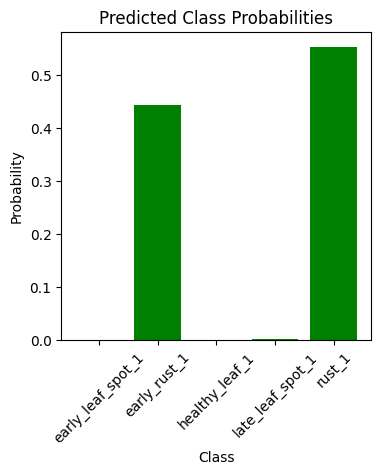

Processing image: /content/drive/MyDrive/DemoTesting/68.jpg


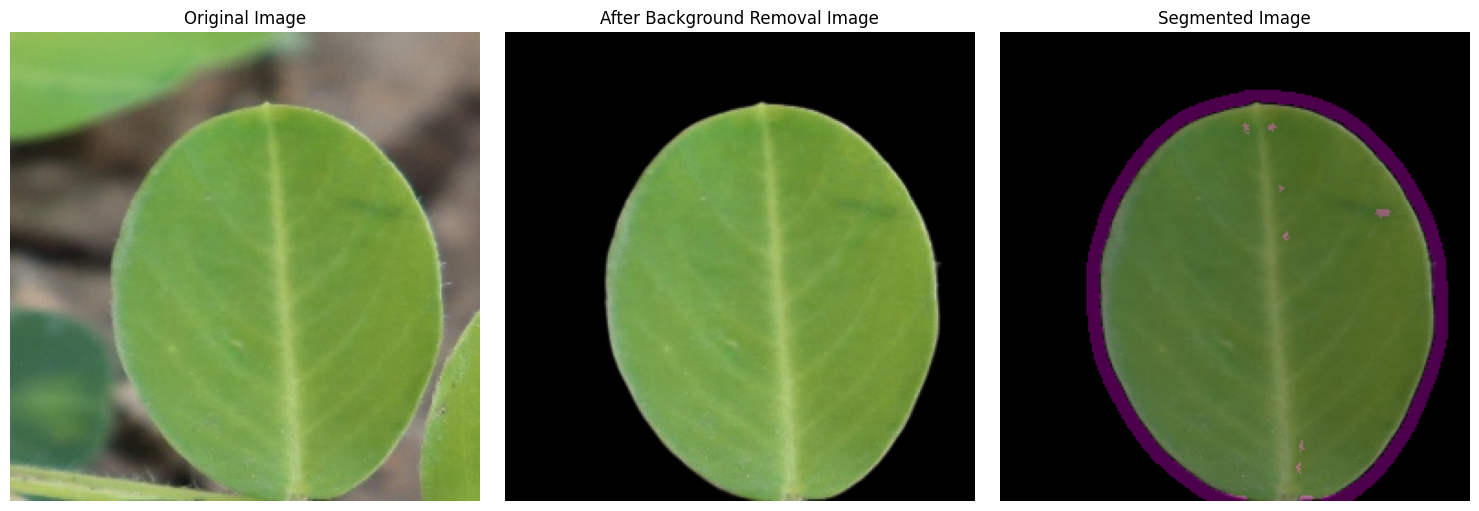

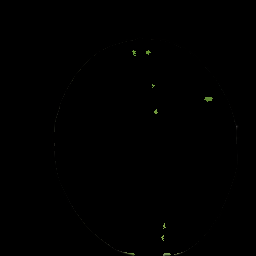

1/1 [==============================] - 0s 87ms/step
Predicted class: 2
Predicted label: healthy_leaf_1


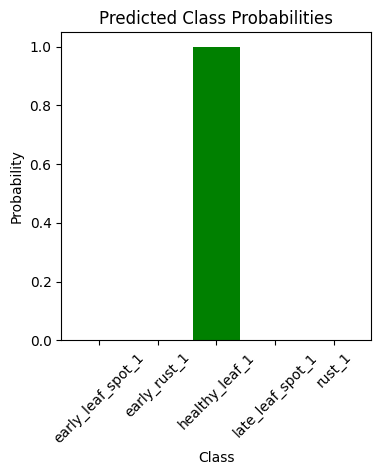

Processing image: /content/drive/MyDrive/DemoTesting/63_3.jpg


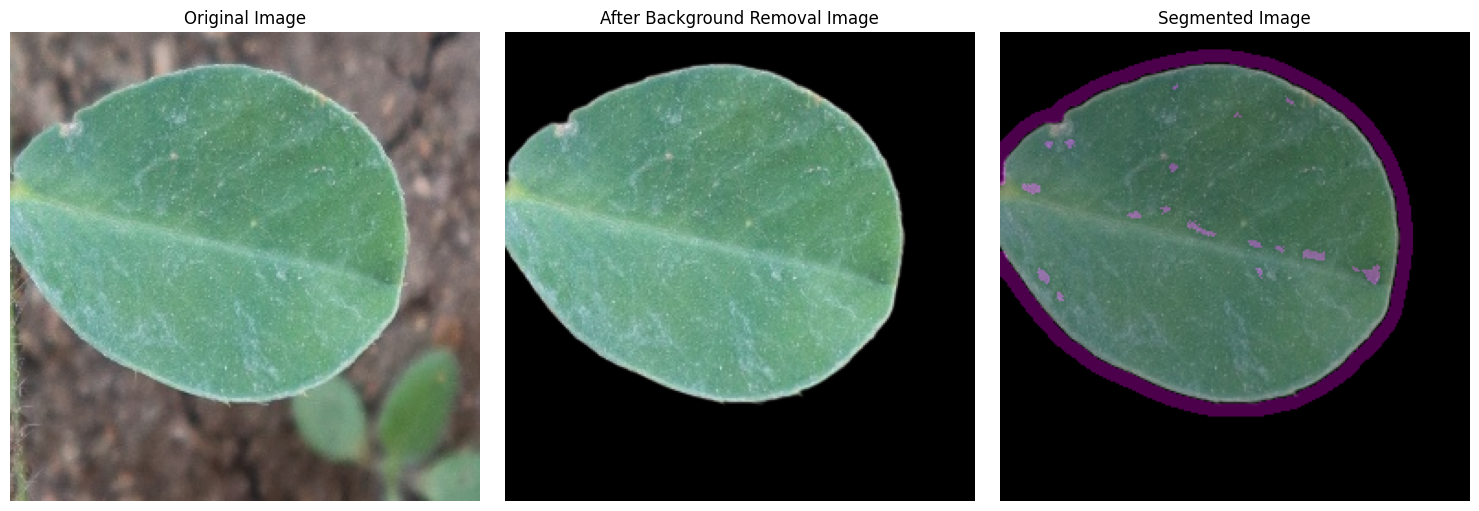

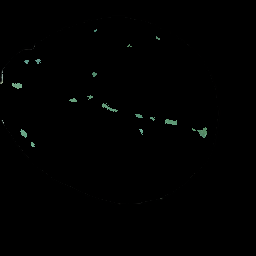

1/1 [==============================] - 0s 64ms/step
Predicted class: 2
Predicted label: healthy_leaf_1


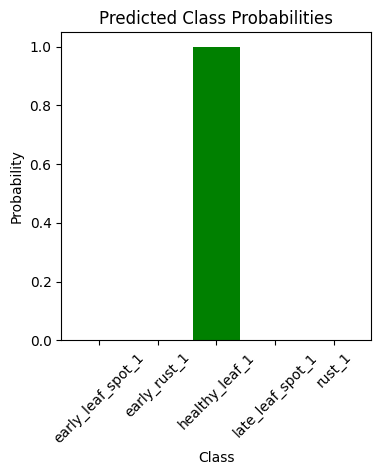

Processing image: /content/drive/MyDrive/DemoTesting/61.jpg


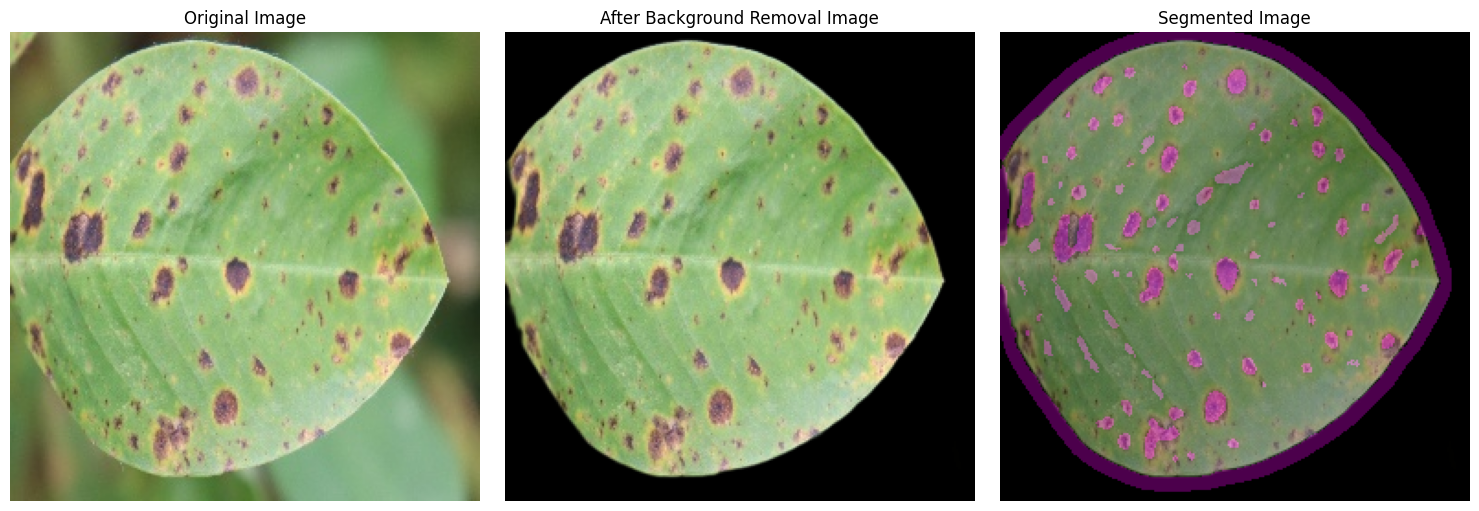

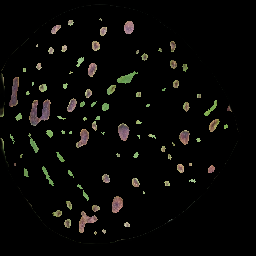

1/1 [==============================] - 0s 67ms/step
Predicted class: 4
Predicted label: rust_1


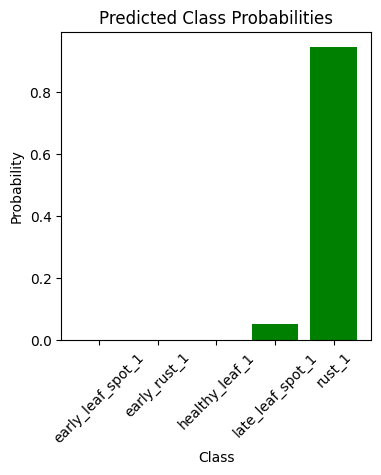

Processing image: /content/drive/MyDrive/DemoTesting/60.jpg


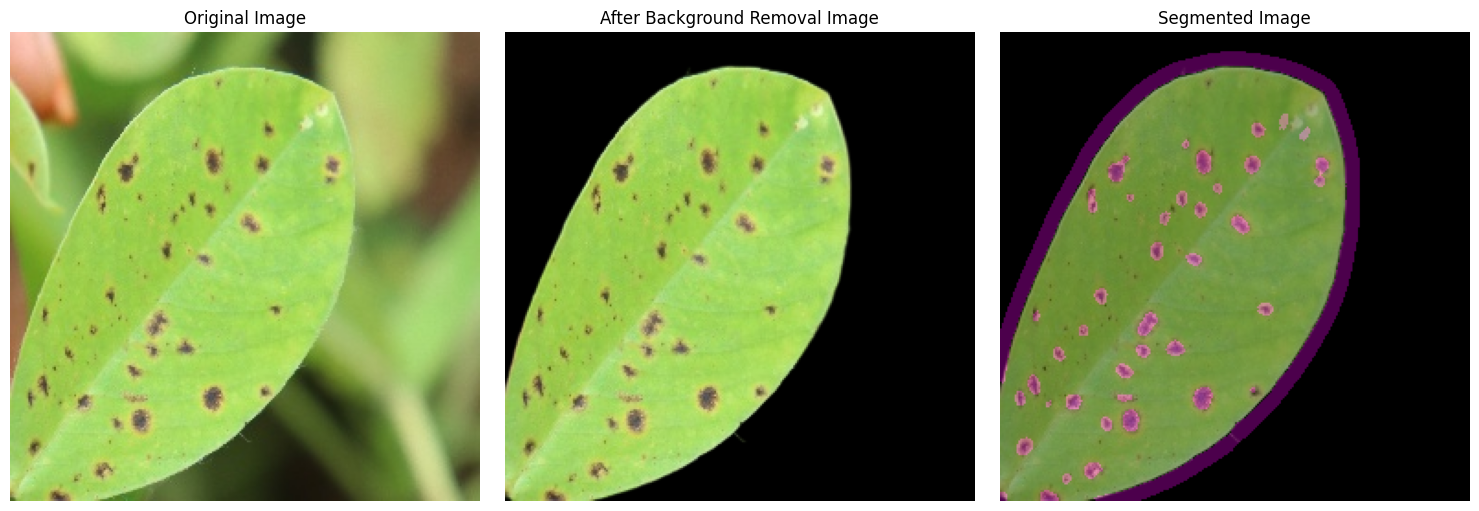

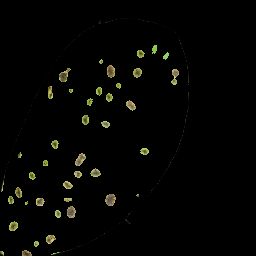

1/1 [==============================] - 0s 68ms/step
Predicted class: 4
Predicted label: rust_1


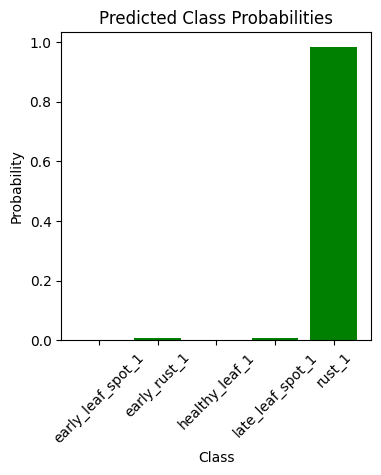

Processing image: /content/drive/MyDrive/DemoTesting/dr_10_6.jpg


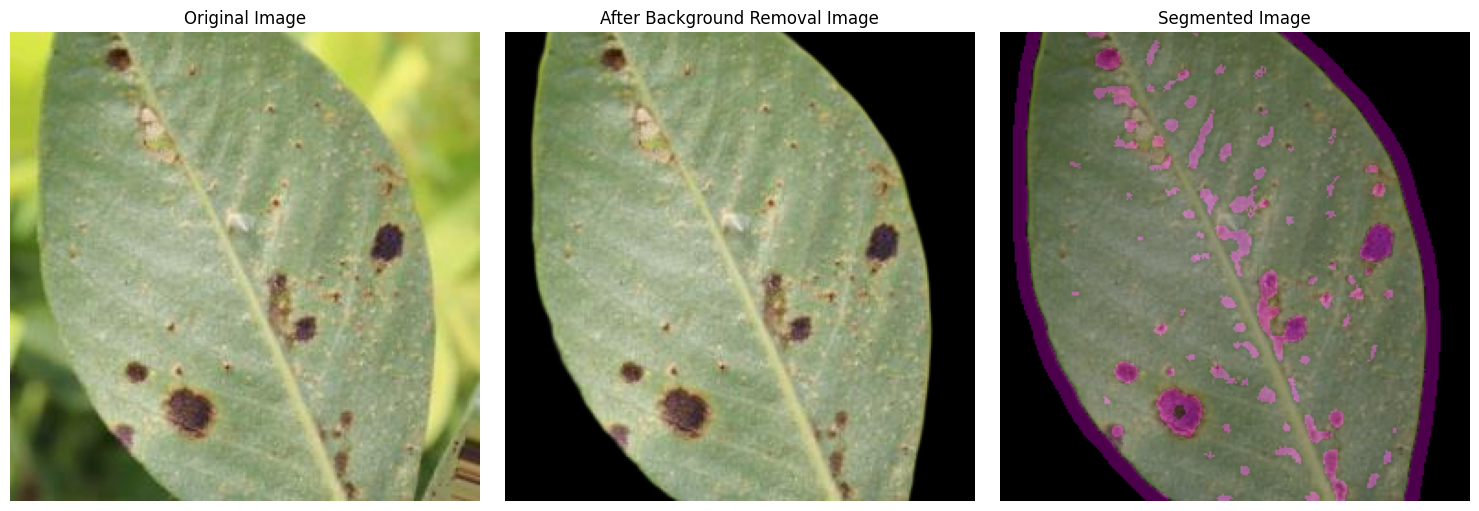

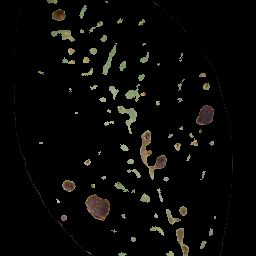

1/1 [==============================] - 0s 60ms/step
Predicted class: 4
Predicted label: rust_1


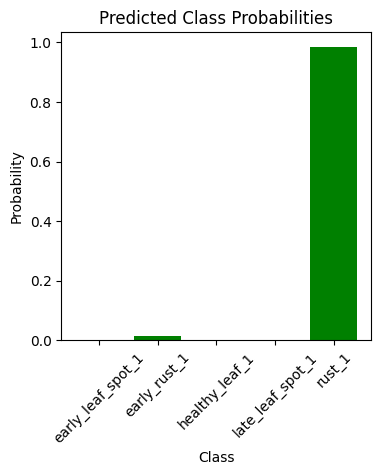

In [ ]:
import os

def predict_classes_in_folder(folder_path, class_labels, model):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            print("Processing image:", image_path)
            predict_class_with_bg_removal(image_path, class_labels, model)


folder_path = '/content/drive/MyDrive/DemoTesting'
predict_classes_in_folder(folder_path, class_labels, loaded_best_model)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = loaded_best_model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())




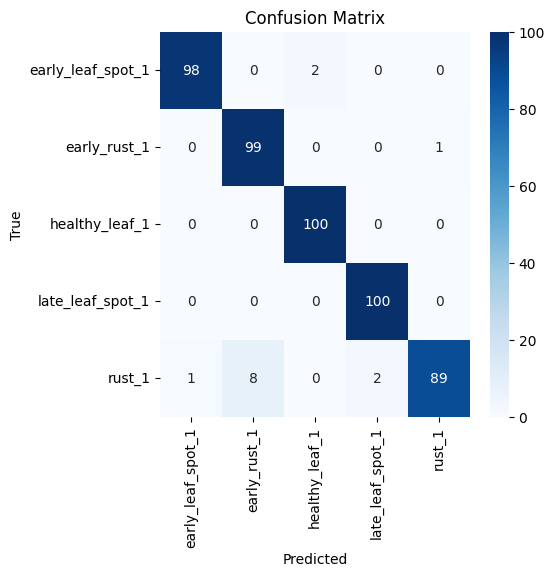

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()